In [63]:
"""Server Similarity & CPU Prediction using KNN
Project Description:
This project simulates server performance data (CPU, Memory, Network Traffic) 
for multiple servers across time intervals and applies K-Nearest Neighbors (KNN) 
for similarity analysis and prediction."""

'Server Similarity & CPU Prediction using KNN\nProject Description:\nThis project simulates server performance data (CPU, Memory, Network Traffic) \nfor multiple servers across time intervals and applies K-Nearest Neighbors (KNN) \nfor similarity analysis and prediction.'

In [45]:
import numpy as np
import pandas as pd 
from sklearn.neighbors import NearestNeighbors, KNeighborsRegressor
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

In [5]:
# simulate server data 
np.random.seed(42)

In [6]:
servers = [f"Sever_{i+1}" for i in range(10)]

In [46]:
#simulate cpu(%), memory(%), network Traffic (mbps) at 5 time intervals 
cpu = np.random.randint(10,90,size=(10,5))
memory = np.random.randint(20,95,size=(10,5))
network = np.random.randint(5,500,size=(10,5))

In [47]:
#combine into dataframe
df_cpu = pd.DataFrame(cpu, columns=[f'CPU_Time_{i+1}' for i in range(5)])
df_mem = pd.DataFrame(memory, columns=[f'Mem_Time_{i+1}' for i in range(5)])
df_net = pd.DataFrame(network, columns=[f'Net_Time_{i+1}' for i in range(5)])

In [48]:
df = pd.concat([df_cpu, df_mem, df_net], axis=1)
df['Server'] = servers
df.set_index('Server', inplace=True)
print("Simulated Server Data (CPU, Memory, Network):")
print(df)

Simulated Server Data (CPU, Memory, Network):
          CPU_Time_1  CPU_Time_2  CPU_Time_3  CPU_Time_4  CPU_Time_5  \
Server                                                                 
Sever_1           32          75          36          11          26   
Sever_2           42          18          52          57          48   
Sever_3           51          35          59          34          33   
Sever_4           22          69          16          66          45   
Sever_5           54          29          74          17          25   
Sever_6           23          85          24          75          41   
Sever_7           72          60          34          67          72   
Sever_8           71          31          67          67          58   
Sever_9           61          51          79          24          63   
Sever_10          69          17          62          69          14   

          Mem_Time_1  Mem_Time_2  Mem_Time_3  Mem_Time_4  Mem_Time_5  \
Server           

In [49]:
x= df.values
knn = NearestNeighbors(n_neighbors=3, metric='euclidean')
knn.fit(x)

NearestNeighbors(metric='euclidean', n_neighbors=3)

In [51]:
print("\nSimilar Servers for Each Server")
for i, server in enumerate(df.index):
    distances, indices = knn.kneighbors([x[i]])
    similar_servers = [(df.index[idx], round(dist,2)) for idx, dist in zip(indices[0], distances[0])]
    print(f"{server}: {similar_servers}")


Similar Servers for Each Server
Sever_1: [('Sever_1', 0.0), ('Sever_5', 142.39), ('Sever_7', 241.74)]
Sever_2: [('Sever_2', 0.0), ('Sever_3', 372.57), ('Sever_5', 546.42)]
Sever_3: [('Sever_3', 0.0), ('Sever_7', 268.54), ('Sever_6', 269.5)]
Sever_4: [('Sever_4', 0.0), ('Sever_10', 411.7), ('Sever_9', 438.37)]
Sever_5: [('Sever_5', 0.0), ('Sever_1', 142.39), ('Sever_8', 235.98)]
Sever_6: [('Sever_6', 0.0), ('Sever_7', 251.01), ('Sever_3', 269.5)]
Sever_7: [('Sever_7', 0.0), ('Sever_1', 241.74), ('Sever_6', 251.01)]
Sever_8: [('Sever_8', 0.0), ('Sever_10', 225.67), ('Sever_5', 235.98)]
Sever_9: [('Sever_9', 0.0), ('Sever_10', 310.03), ('Sever_4', 438.37)]
Sever_10: [('Sever_10', 0.0), ('Sever_8', 225.67), ('Sever_5', 259.97)]


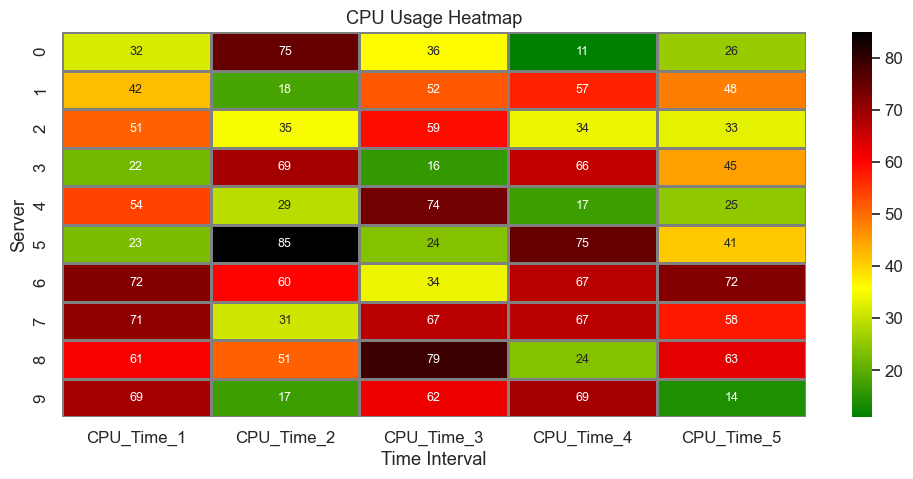

In [52]:
colors = ['green', 'yellow', 'red', 'black']
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)
plt.figure(figsize=(12,5))
sns.heatmap(df_cpu, annot=True, cmap=cmap, linewidths=0.8, linecolor='gray', fmt="d", annot_kws={"size":9})
plt.title("CPU Usage Heatmap")
plt.ylabel("Server")
plt.xlabel("Time Interval")
plt.show()

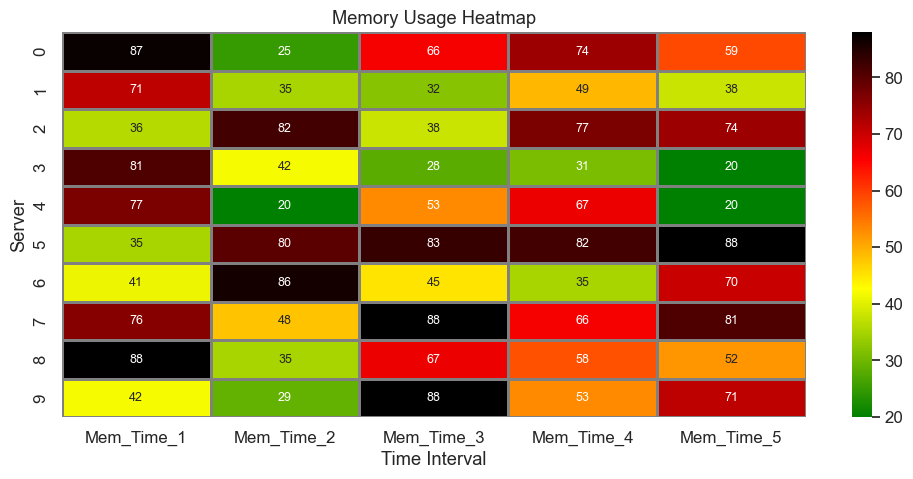

In [54]:
plt.figure(figsize=(12,5))
sns.heatmap(df_mem, annot=True, cmap=cmap, linewidths=0.8, linecolor='gray', fmt="d", annot_kws={"size":9})
plt.title("Memory Usage Heatmap")
plt.ylabel("Server")
plt.xlabel("Time Interval")
plt.show()

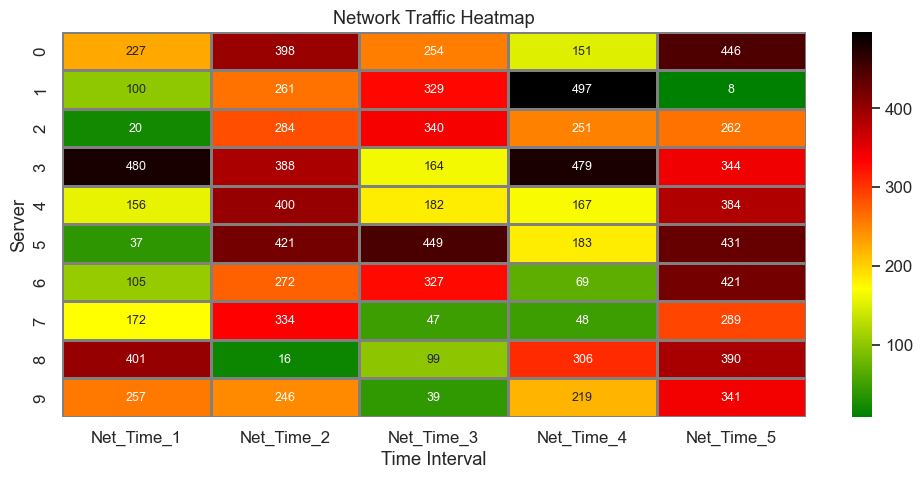

In [55]:
plt.figure(figsize=(12,5))
sns.heatmap(df_net, annot=True, cmap=cmap, linewidths=0.8, linecolor='gray', fmt="d", annot_kws={"size":9})
plt.title("Network Traffic Heatmap")
plt.ylabel("Server")
plt.xlabel("Time Interval")
plt.show()

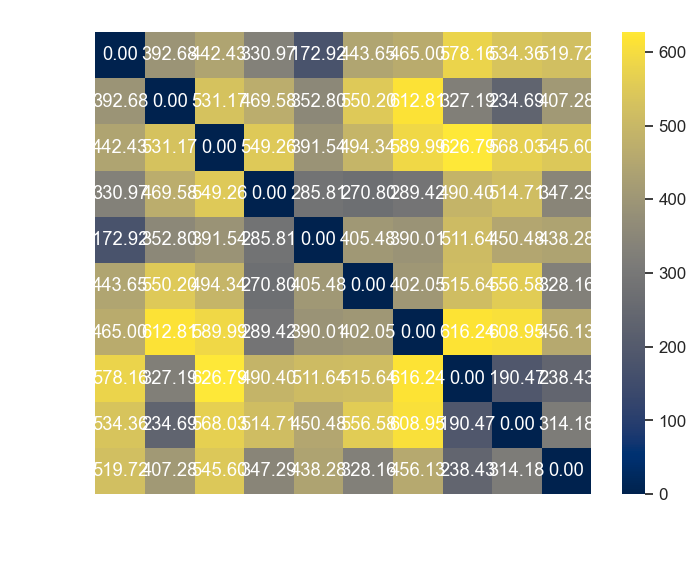

In [44]:
from sklearn.metrics import pairwise_distances
x= df.values  
similarity_matrix = pairwise_distances(x, metric='euclidean')
plt.figure(figsize=(8,6))
sns.heatmap(similarity_matrix, annot=True, fmt=".2f", cmap='cividis', xticklabels=df.index, yticklabels=df.index, annot_kws={"color":"white"})
plt.title('Euclidean Distance Between Servers (Lower = More Similar)', color='white')
plt.xticks(rotation=45, color='white')
plt.yticks(rotation=0, color='white')
plt.gca().set_facecolor('black')  
plt.show()

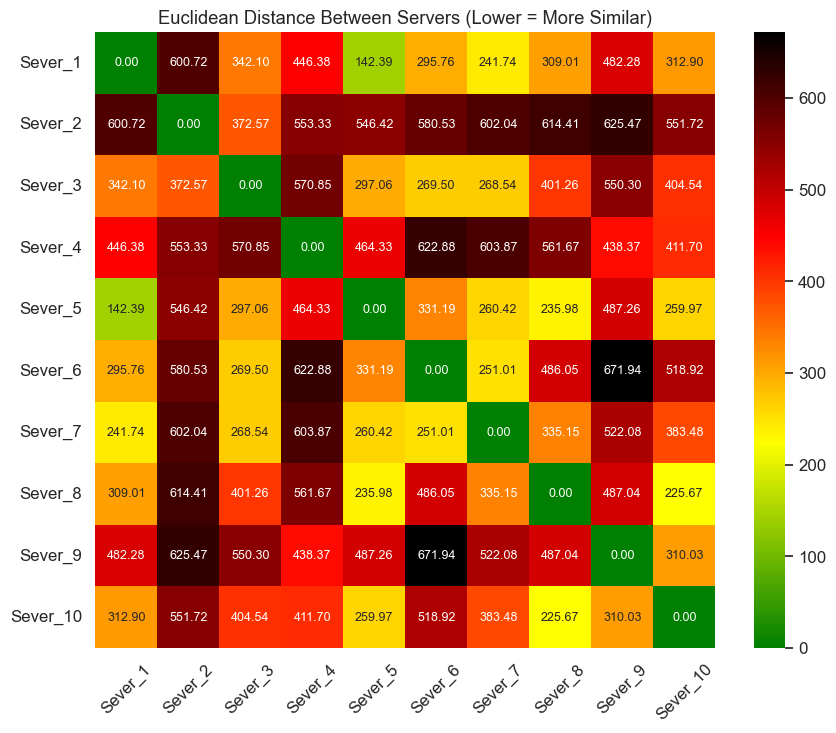

In [57]:
#similarity matrix heatmap
similarity_matrix = pairwise_distances(x, metric='euclidean')
plt.figure(figsize=(10,8))
sns.heatmap(similarity_matrix, annot=True, fmt=".2f", cmap=cmap, xticklabels=df.index, yticklabels=df.index, annot_kws={"size":9})
plt.title("Euclidean Distance Between Servers (Lower = More Similar)")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

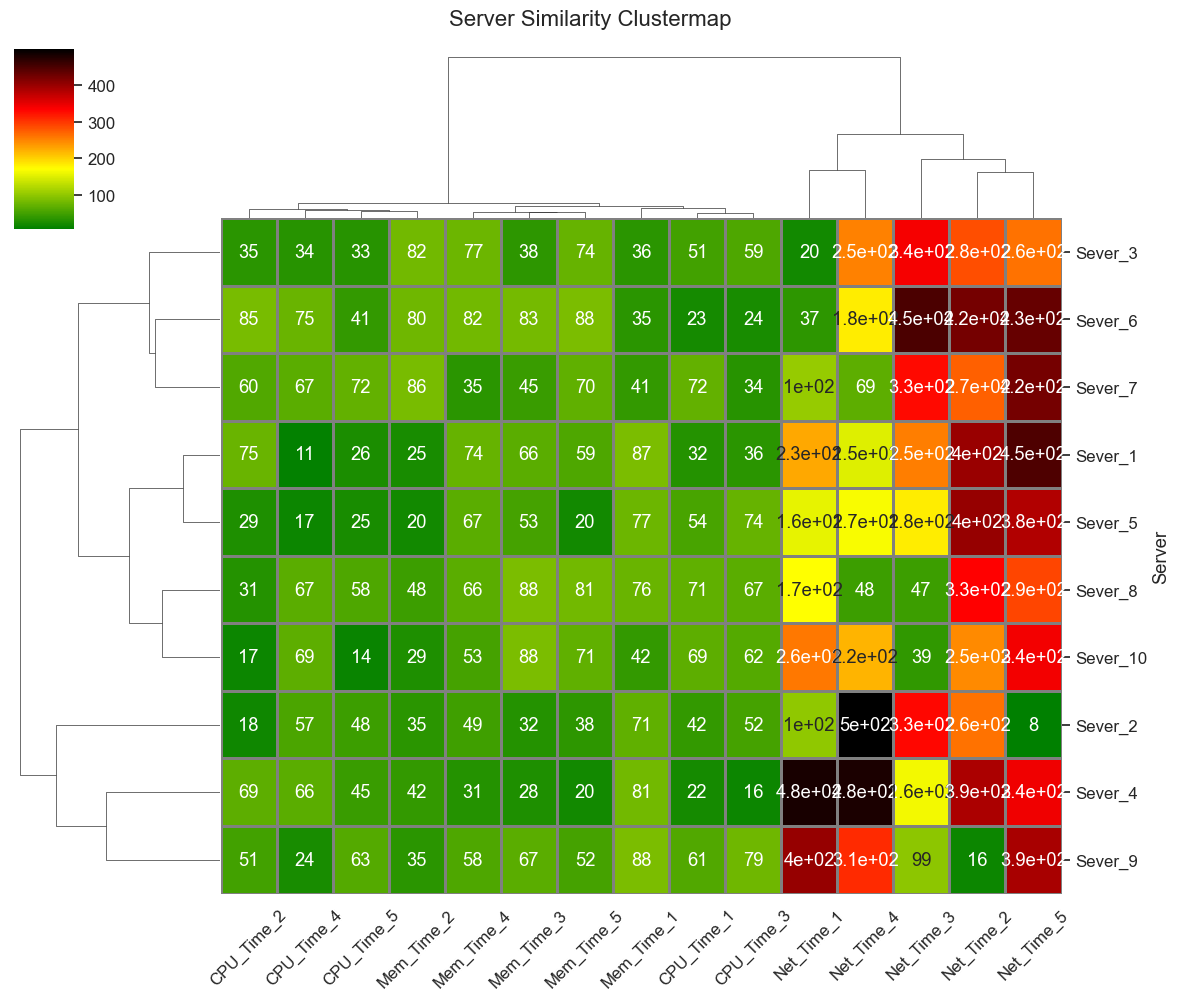

In [58]:
# clustermap for server similarity
sns.set(font_scale=1.1)
clustermap = sns.clustermap(df, cmap=cmap, linewidths=0.8, linecolor='gray', annot=True, metric='euclidean', method='ward', figsize=(12,10))
plt.suptitle('Server Similarity Clustermap', fontsize=16, y=1.02)
for label in clustermap.ax_heatmap.get_xticklabels():
    label.set_rotation(45)
for label in clustermap.ax_heatmap.get_yticklabels():
    label.set_rotation(0)
plt.show()

In [60]:
# predict CPU at next interval using knn regression
np.random.seed(100)
cpu_next = np.random.randint(10,90,size=(10,1))
df['CPU_Time_6_Actual'] = cpu_next

In [61]:
# KNN Regression using previous 5 CPU intervals
X_cpu = df_cpu.values
y_cpu = df['CPU_Time_6_Actual'].values
knn_reg = KNeighborsRegressor(n_neighbors=3, metric='euclidean')
knn_reg.fit(X_cpu, y_cpu)
predicted_cpu = knn_reg.predict(X_cpu)
df['CPU_Time_6_Predicted'] = predicted_cpu.round(2)
print("\nCPU Prediction for Next Interval")
print(df[['CPU_Time_6_Actual','CPU_Time_6_Predicted']])


CPU Prediction for Next Interval
          CPU_Time_6_Actual  CPU_Time_6_Predicted
Server                                           
Sever_1                  18                 61.33
Sever_2                  34                 58.00
Sever_3                  77                 56.33
Sever_4                  89                 57.00
Sever_5                  58                 70.33
Sever_6                  20                 57.00
Sever_7                  62                 71.33
Sever_8                  63                 53.00
Sever_9                  76                 70.33
Sever_10                 24                 40.33


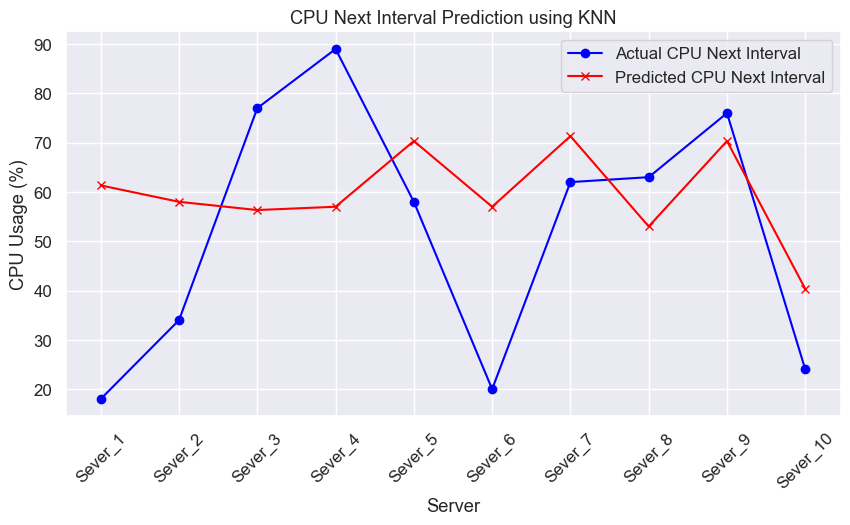

In [62]:
#cpu prediction
plt.figure(figsize=(10,5))
plt.plot(df.index, df['CPU_Time_6_Actual'], marker='o', color='blue', label='Actual CPU Next Interval')
plt.plot(df.index, df['CPU_Time_6_Predicted'], marker='x', color='red', label='Predicted CPU Next Interval')
plt.title("CPU Next Interval Prediction using KNN")
plt.ylabel("CPU Usage (%)")
plt.xlabel("Server")
plt.xticks(rotation=45)
plt.legend()
plt.show()